In [152]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy import stats
from collections import Counter
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

# **Introduction**

For this experiment we will use a dataset of NBA player statistics. This dataset contains a record of season averages for all active NBA players during the 2017-18 season, including advanced statistics. However, for the purposes of this analysis, we will pare down the data to just several entries and focus specifically on the variables PER (player efficiency rating, which primarily measures a player's overall offensive production) and TS% (true shooting percentage, which quantifies all aspects of a player's shooting efficiency into one stat).

# **Exploring the Data**

In [153]:
nba = pd.read_csv('nba.csv')

In [154]:
nba.shape

(664, 29)

In [155]:
nba.describe()

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
count,664.000000,664.000000,664.000000,664.000000,664.000000,660.000000,660.000000,660.000000,664.000000,664.000000,...,0.0,664.000000,664.000000,664.000000,664.000000,0.0,664.000000,664.000000,664.000000,664.000000
mean,270.823795,26.194277,43.280120,972.881024,12.719880,0.528718,0.342206,0.249379,4.744428,14.918072,...,NaN,1.041265,0.974398,2.017771,0.071419,NaN,-1.669428,-0.715361,-2.384940,0.465211
std,154.830333,4.127665,27.743598,836.159716,8.713523,0.135837,0.233292,0.263980,4.552463,8.046967,...,NaN,1.757985,1.027690,2.571878,0.154053,NaN,5.093578,2.721298,6.079733,1.148930
min,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,-2.400000,0.000000,-0.900000,-1.065000,NaN,-38.900000,-20.100000,-59.000000,-1.300000
25%,139.000000,23.000000,17.000000,186.000000,9.200000,0.494000,0.161750,0.143000,1.700000,10.075000,...,NaN,0.000000,0.100000,0.100000,0.028750,NaN,-3.300000,-1.900000,-4.225000,-0.100000
50%,266.500000,26.000000,46.000000,755.000000,12.650000,0.540000,0.355500,0.221000,3.200000,13.900000,...,NaN,0.400000,0.600000,1.100000,0.079000,NaN,-1.300000,-0.600000,-1.800000,0.000000
75%,401.250000,29.000000,71.000000,1651.500000,16.200000,0.581250,0.486250,0.313000,6.800000,18.925000,...,NaN,1.600000,1.500000,3.100000,0.120000,NaN,0.200000,0.700000,0.300000,0.700000
max,540.000000,41.000000,82.000000,3026.000000,133.800000,1.500000,1.000000,5.333000,36.000000,100.000000,...,NaN,11.600000,5.700000,15.400000,2.712000,NaN,68.600000,16.300000,54.400000,8.900000


In [156]:
nba.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,1134,9.0,0.567,0.759,...,NaN,1.3,1.0,2.2,0.094,NaN,-0.5,-1.7,-2.2,-0.1
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,1359,8.2,0.525,0.800,...,NaN,-0.1,1.1,1.0,0.036,NaN,-2.0,-0.2,-2.2,-0.1
2,3,Steven Adams\adamsst01,C,24,OKC,76,2487,20.6,0.630,0.003,...,NaN,6.7,3.0,9.7,0.187,NaN,2.2,1.1,3.3,3.3
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,1368,15.7,0.570,0.021,...,NaN,2.3,1.9,4.2,0.148,NaN,-1.6,1.8,0.2,0.8
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,682,5.8,0.516,0.432,...,NaN,-0.1,0.2,0.1,0.009,NaN,-4.1,-1.8,-5.8,-0.7


In [157]:
nba = nba[['Player', 'Pos', 'Age', 'MP', 'PER', 'TS%']]

nba.columns = ['Player',
               'Pos',
               'Age',
               'MP',
               'PER',
               'TS%']

columns_float = ['Age',
                 'MP',
                 'PER',
                 'TS%',]

nba[columns_float] = nba[columns_float].astype(float)

nba.dropna(axis=0)

nba.head()

,Player,Pos,Age,MP,PER,TS%
0,Alex Abrines\abrinal01,SG,24.0,1134.0,9.0,0.567
1,Quincy Acy\acyqu01,PF,27.0,1359.0,8.2,0.525
2,Steven Adams\adamsst01,C,24.0,2487.0,20.6,0.630
3,Bam Adebayo\adebaba01,C,20.0,1368.0,15.7,0.570
4,Arron Afflalo\afflaar01,SG,32.0,682.0,5.8,0.516


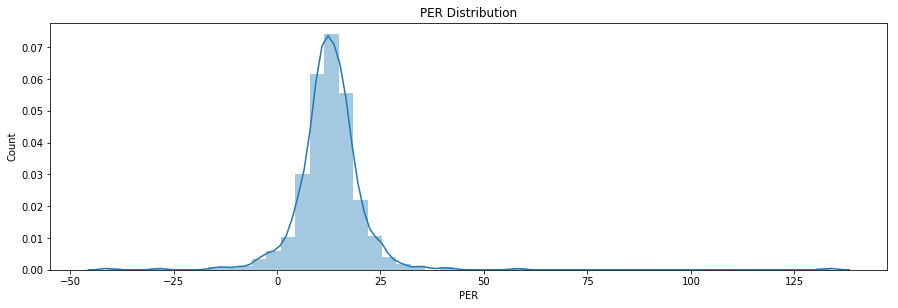

In [158]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)

g = sns.distplot(nba['PER'])

g.set_title('PER Distribution')
g.set_xlabel('PER')

plt.show()

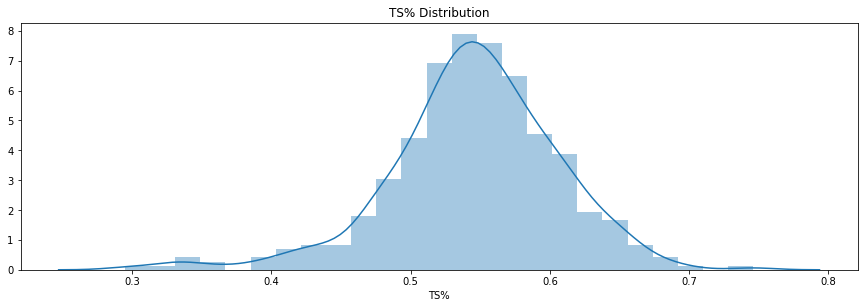

In [185]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)

g = sns.distplot(nba['TS%'])

g.set_title('TS% Distribution')
g.set_xlabel('TS%')

plt.show()

Both distributions appear close to normal. The overall TS% distribution appears to make sense. However, in the case of PER, there are some strange outliers; for example, negative values of PER or values above 50 don't make any sense. This seems to be caused by players who played a very limited amount of minutes. Thus, we will attempt to clean the data first by filtering out players who have played less than 100 minutes. Additionally, for the sake of simplicity, we will remove players who were traded mid-season (and thus appear multiple times in the data with separate stats for each team).

# **Cleaning the Data**

In [159]:
nba = nba.drop_duplicates(subset=['Player'], keep=False)
nba.head()

,Player,Pos,Age,MP,PER,TS%
0,Alex Abrines\abrinal01,SG,24.0,1134.0,9.0,0.567
1,Quincy Acy\acyqu01,PF,27.0,1359.0,8.2,0.525
2,Steven Adams\adamsst01,C,24.0,2487.0,20.6,0.630
3,Bam Adebayo\adebaba01,C,20.0,1368.0,15.7,0.570
4,Arron Afflalo\afflaar01,SG,32.0,682.0,5.8,0.516


In [160]:
nba = nba[nba.MP >= 100]
nba.head()

,Player,Pos,Age,MP,PER,TS%
0,Alex Abrines\abrinal01,SG,24.0,1134.0,9.0,0.567
1,Quincy Acy\acyqu01,PF,27.0,1359.0,8.2,0.525
2,Steven Adams\adamsst01,C,24.0,2487.0,20.6,0.630
3,Bam Adebayo\adebaba01,C,20.0,1368.0,15.7,0.570
4,Arron Afflalo\afflaar01,SG,32.0,682.0,5.8,0.516


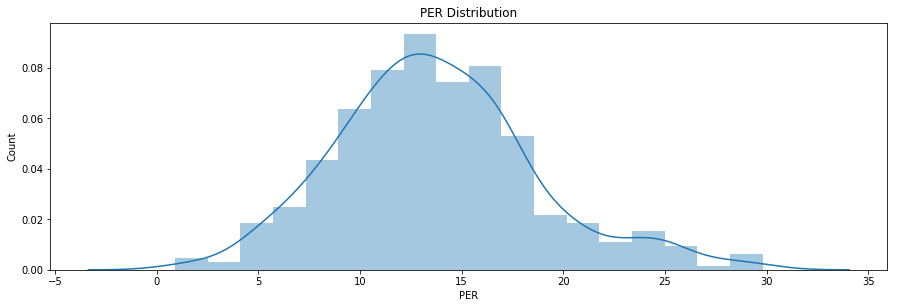

In [161]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)

g = sns.distplot(nba['PER'])

g.set_title('2017-18 NBA Player PER Distribution')
g.set_xlabel('PER')

plt.show()

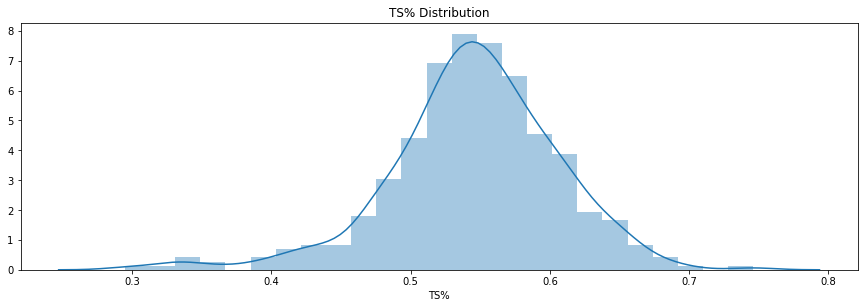

In [184]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)

g = sns.distplot(nba['TS%'])

g.set_title('2017-18 NBA Player TS% Distribution')
g.set_xlabel('TS%')

plt.show()

Our TS% distribution plot didn't change much. However, our PER distribution plot did change. Notice how the range of the x-axis has been reduced, since our cleaned dataset now only contains PER values between 0 and 30. This is much more in line with the typical range of PER for players in the NBA. Anything outside of this general range should be considered an outlier, most likely due to playing limited minutes. Typically, the average player PER in the NBA is around 15, although we will measure it more precisely for the players in this dataset.

# **Research Proposal**

Did NBA players age 28 and over (at the start of the 2017-18 NBA season) have a higher PER and TS%, on average, than players between 24 and 28?

# **Hypothesis**

I expect players age 28 and over to have a higher average PER and TS%, since they have more experience in the league and thus, probably have more well-developed basketball skills overall than the younger group.

# **Method of Testing**

For this analysis, I will split the nba dataframe into two separate dataframes, divided into the separate age groups. Then, I will plot the distributions for both PER and TS%, as well as run a t-test to estimate whether the groups are statistically different.

In [162]:
nba_young = nba[(nba['Age'] >= 24) & (nba['Age'] < 28)]
nba_old = nba[nba['Age'] >= 28]

In [165]:
nba_young.head()

,Player,Pos,Age,MP,PER,TS%
0,Alex Abrines\abrinal01,SG,24.0,1134.0,9.0,0.567
1,Quincy Acy\acyqu01,PF,27.0,1359.0,8.2,0.525
2,Steven Adams\adamsst01,C,24.0,2487.0,20.6,0.630
8,Kadeem Allen\allenka01,PG,25.0,107.0,2.6,0.366
10,Al-Farouq Aminu\aminual01,PF,27.0,2072.0,12.0,0.522


In [167]:
nba_old.head()

,Player,Pos,Age,MP,PER,TS%
4,Arron Afflalo\afflaar01,SG,32.0,682.0,5.8,0.516
6,LaMarcus Aldridge\aldrila01,C,32.0,2509.0,25.0,0.570
9,Tony Allen\allento01,SF,36.0,273.0,8.7,0.514
13,Ryan Anderson\anderry01,PF,29.0,1725.0,12.6,0.592
16,Carmelo Anthony\anthoca01,PF,33.0,2501.0,12.7,0.503


In [166]:
nba_young.describe()

,Age,MP,PER,TS%
count,138.000000,138.000000,138.000000,138.000000
mean,25.355072,1371.942029,13.847101,0.546384
std,1.132149,814.308742,4.925729,0.061312
min,24.000000,104.000000,2.200000,0.332000
25%,24.000000,606.750000,10.425000,0.521250
50%,25.000000,1402.500000,13.450000,0.547000
75%,26.000000,2012.500000,16.800000,0.583000
max,27.000000,2982.000000,28.900000,0.676000


In [168]:
nba_old.describe()

,Age,MP,PER,TS%
count,137.000000,137.000000,137.000000,137.000000
mean,31.014599,1441.890511,14.420438,0.560022
std,2.872244,765.078184,4.937121,0.052500
min,28.000000,115.000000,4.000000,0.398000
25%,29.000000,814.000000,11.400000,0.529000
50%,30.000000,1486.000000,13.900000,0.556000
75%,32.000000,2043.000000,16.600000,0.594000
max,41.000000,3026.000000,29.800000,0.696000


In [169]:
print(nba_young.shape)
print('Avg PER: ', nba_young['PER'].mean())
print('Avg TS%: ', nba_young['TS%'].mean())

(138, 6)
Avg PER:  13.847101449275366
Avg TS%:  0.5463840579710145


In [170]:
print(nba_old.shape)
print('Avg PER: ', nba_old['PER'].mean())
print('Avg TS%: ', nba_old['TS%'].mean())

(137, 6)
Avg PER:  14.420437956204385
Avg TS%:  0.5600218978102192


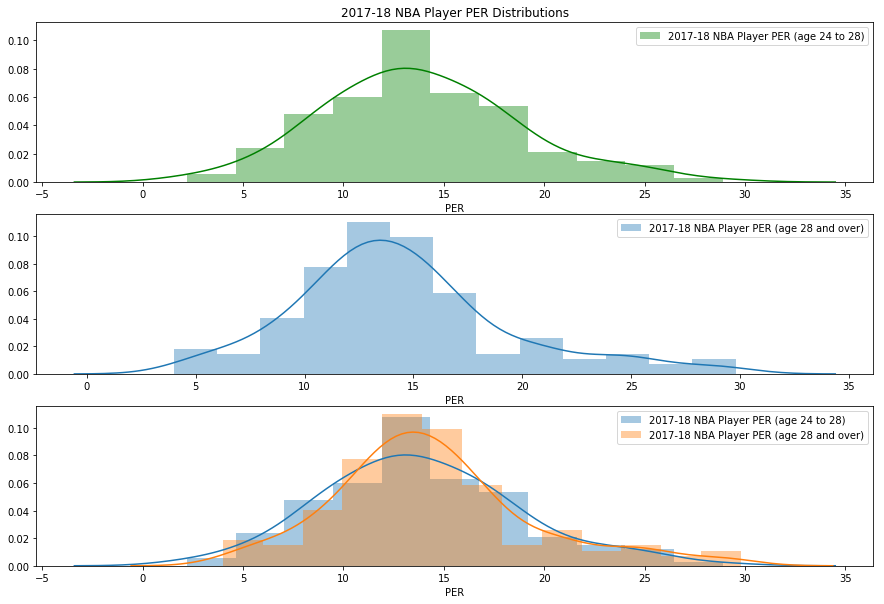

In [182]:
plt.figure(figsize=(15,10))

plt.subplot(311)
sns.distplot(nba_young['PER'], color='g', label='PER (age 24 to 28)')
plt.legend(loc='upper right')
plt.xlabel('PER')
plt.title('2017-18 NBA Player PER Distributions')

plt.subplot(312)
sns.distplot(nba_old['PER'], label='PER (age 28 and over)')
plt.legend(loc='upper right')
plt.xlabel('PER')

plt.subplot(313)
sns.distplot(nba_young['PER'], label='PER (age 24 to 28)')
sns.distplot(nba_old['PER'], label='PER (age 28 and over)')
plt.legend(loc='upper right')
plt.xlabel('PER')

plt.show()

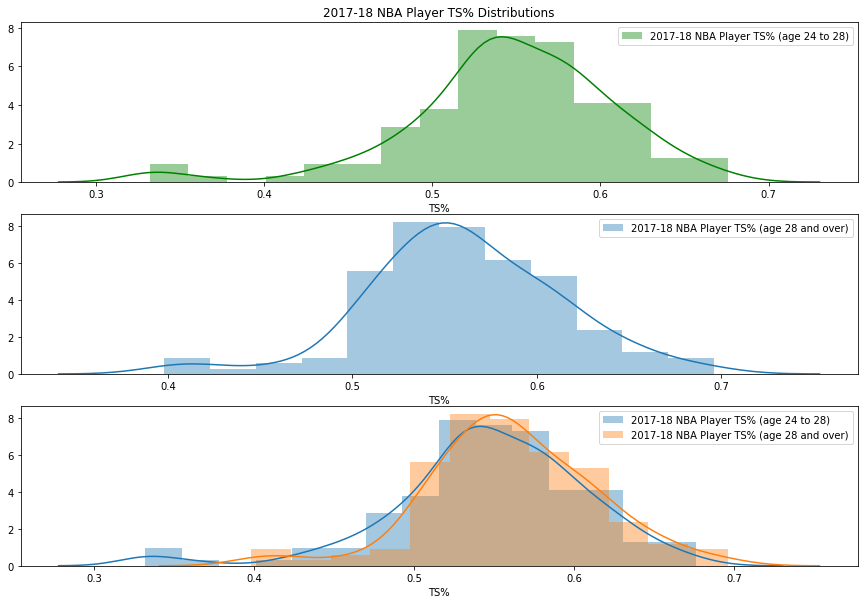

In [183]:
plt.figure(figsize=(15,10))

plt.subplot(311)
sns.distplot(nba_young['TS%'], color='g', label='TS% (age 24 to 28)')
plt.legend(loc='upper right')
plt.xlabel('TS%')
plt.title('2017-18 NBA Player TS% Distributions')

plt.subplot(312)
sns.distplot(nba_old['TS%'], label='TS% (age 28 and over)')
plt.legend(loc='upper right')
plt.xlabel('TS%')

plt.subplot(313)
sns.distplot(nba_young['TS%'], label='TS% (age 24 to 28)')
sns.distplot(nba_old['TS%'], label='TS% (age 28 and over)')
plt.legend(loc='upper right')
plt.xlabel('TS%')

plt.show()

In [173]:
stats.ttest_ind(nba_young['PER'], nba_old['PER'])

Ttest_indResult(statistic=-0.96398925855510786, pvalue=0.33590442332723436)

In [174]:
stats.ttest_ind(nba_young['TS%'], nba_old['TS%'])

Ttest_indResult(statistic=-1.9806197867501298, pvalue=0.048637554847780193)

The average PER for the younger group was 13.85, while the older group had a slightly higher average PER of 14.42. Meanwhile, the average TS% for the younger group was 54.6%, while the average TS% for the older group was also higher, at 56.0%. Thus, from looking at the mean values, our initial suspicions are confirmed. However, the distribution plots and t-test results paint a slightly different picture, at least for PER. Our p-value for PER was not low, at 0.336, which means that as far as PER is concerned, the two groups are not statistically different. Thus, we must reject our null hypothesis. This is surprising, but could also be caused by inherent bias in the sample. On the other hand, our p-value for TS% was low, at only 0.0486, so it is good enough for us to not reject our null hypothesis. Thus, as far as TS% is concerned, the two samples are significantly different, and it is reasonable to conclude that, on average, the older group of NBA players had a significantly higher TS% than those in the younger group. Future studies could be improved by looking at other variables that affect player performance, and trying to remove further bias by accounting for these variables.